# Timing diagrams 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


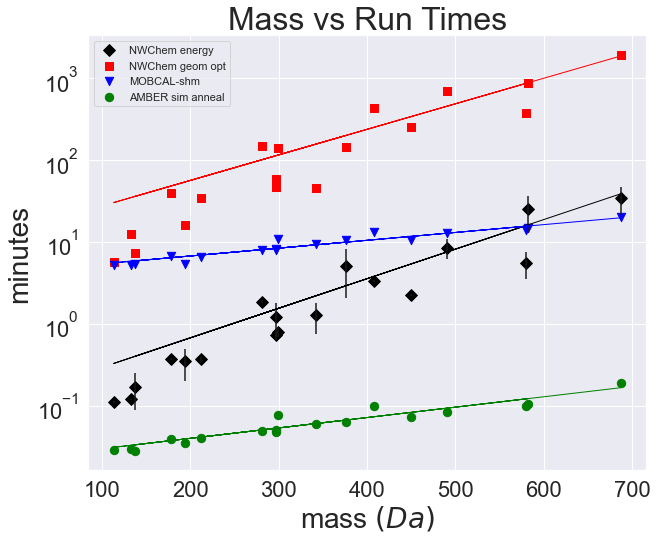

,NWChem energy,NWChem geom opt,MOBCAL-shm,AMBER sim anneal
mean,5.152881,293.730741,9.834439,0.067676
stdev,9.233886,464.735688,3.990349,0.038798
max,34.857471,1923.980000,20.153218,0.190260
min,0.112842,5.823333,5.266549,0.028920


In [5]:
df = pd.read_csv('../data/all_times.csv')

sns.set(style="darkgrid")

x = df['Mass (Da)']
y = df['E Opt Ave CPU (min)']
e = df['E Opt CPU Stdev (min)']
y2 = df['DFT GO CPU ave (min)']

plt.figure(figsize=(10,8))
plt.scatter(x, y, s=70, c='black', marker='D', label='NWChem energy')
plt.errorbar(x, y, e, ecolor='k', linestyle='None', label=None)
fit_vals = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
fit = np.exp(fit_vals[1]) * np.exp(fit_vals[0] * x.values)
plt.plot(x, fit, color='black', linestyle='-', linewidth=1)
plt.yscale('log')

plt.scatter(x, y2, s=70, c='red', marker='s', label='NWChem geom opt')
fit_vals = np.polyfit(x, np.log(y2), 1, w=np.sqrt(y2))
fit = np.exp(fit_vals[1]) * np.exp(fit_vals[0] * x.values)
plt.plot(x, fit, color='red', linestyle='-', linewidth=1)
plt.yscale('log')

y3 = df['MOBCAL ave (min)']
plt.scatter(x, y3, s=70, c='blue', marker='v', label='MOBCAL-shm')
fit_vals = np.polyfit(x, np.log(y3), 1, w=np.sqrt(y3))
fit = np.exp(fit_vals[1]) * np.exp(fit_vals[0] * x.values)
plt.plot(x, fit, color='blue', linestyle='-', linewidth=1)
plt.yscale('log')

y4 = df['AMBER MD ave conformer min']
plt.scatter(x, y4, s=70, c='green', label='AMBER sim anneal')
fit_vals = np.polyfit(x, np.log(y4), 1, w=np.sqrt(y4))
fit = np.exp(fit_vals[1]) * np.exp(fit_vals[0] * x.values)
plt.plot(x, fit, color='green', linestyle='-', linewidth=1)
plt.yscale('log')

plt.title('Mass vs Run Times', fontsize=32)
plt.xlabel('mass $\it{(Da)}$', fontsize=28)
plt.ylabel('minutes', fontsize=28)
plt.legend(loc='upper left')

plt.tick_params(axis='both', which='major', labelsize=22)

# Create adjacent table
tabledf = pd.DataFrame(index=['mean', 'stdev', 'max', 'min'])
tabledf['NWChem energy'] = [np.mean(y), np.std(y), np.max(y), np.min(y)]
tabledf['NWChem geom opt'] = [np.mean(y2), np.std(y2), np.max(y2), np.min(y2)]
tabledf['MOBCAL-shm'] = [np.mean(y3), np.std(y3), np.max(y3), np.min(y3)]
tabledf['AMBER sim anneal'] = [np.mean(y4), np.std(y4), np.max(y4), np.min(y4)]

#plt.savefig('software-run-times.png', bbox_inches='tight', dpi=600)
plt.show()
tabledf
